# I. Overview
---

Objective: Program ini dibuat untuk memprediksi harga laptop berdasarkan kriteria yang diinginkan oleh calon pembeli. Program ini dibuat dengan Machine Learning Supervised Learning dengan Regression menggunakan 5 algoritma permodelan yaitu KNN, SVM, Decision Tree, Random Forest, dan Boosting. Lalu dipilih model terbaik dari kelima model untuk dilakukan hyperparameter tuning dan dipilih kembali model yanbg terbaik akan dijadikan ke model inference.

Dataset Informasi:

Perusahaan: Produsen Laptop.

Produk: Merek dan Model.

Nama Tipe: Jenis Laptop (Notebook, Ultrabook, Gaming, ...dll).

Inci: Ukuran Layar.

Ram: Jumlah total RAM dalam laptop (GB).

OS: Sistem Operasi yang diinstal.

Berat: Berat laptop dalam kilogram.

Price_euros: Harga Laptop dalam Euro. (Target)

Layar: definisi layar (Standar, Full HD, 4K Ultra HD, Quad HD+).

ScreenW: lebar layar (piksel).

ScreenH: tinggi layar (piksel).

Layar sentuh: apakah laptop memiliki layar sentuh atau tidak.

IPSpanel: apakah laptop memiliki panel IPS atau tidak.

RetinaDisplay: apakah laptop memiliki layar retina atau tidak.

CPU_company

CPU_freq: frekuensi CPU laptop (Hz).

CPU_model

PrimaryStorage: ruang penyimpanan utama (GB).

PrimaryStorageType: jenis penyimpanan utama (HDD, SSD, Penyimpanan Flash, Hibrida).

SecondaryStorage: ruang penyimpanan sekunder jika ada (GB).

SecondaryStorageType: jenis penyimpanan sekunder (HDD, SSD, Hibrida, Tidak Ada).

Perusahaan_GPU

Model_GPU

# II. Import Libraries
---


In [1]:
# Import package

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Data Splitting
from sklearn.model_selection import train_test_split

# Feature Scaling & Encoding
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

# Pipeline
from sklearn.pipeline import Pipeline

# Compose
from sklearn.compose import ColumnTransformer

# Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Statistical Analysis
from scipy.stats import kendalltau, spearmanr

# Model Evaluation
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

# Model Persistence
import pickle

import warnings
warnings.filterwarnings('ignore')

# III. Data Loading
---

In [3]:
# load data from csv
data = pd.read_csv('./dataset_raw.csv')
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [4]:
# Copy data ke df
df = data.copy()
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [5]:
# Menampilkan informasi pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

Berdasarkan data di atas, untuk Ram, PrimaryStorage, dan SecondaryStorage setelah dilihat merupakan data ordinal. Jadi pada saat FE di awal, akan dilakukan mapping untuk mengkategorikannya.

Lalu pada kolom ScreenW dan ScreenH dapat dideskripsikan dengan kolom Inches. Jadi pada bagian FE akan dilakukan drop kolom ScreenW dan ScreenH.

In [5]:
# Manampilkan statistik deskriptif
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1275.0,15.022902,1.429470,10.10,14.0,15.60,15.60,18.4
Ram,1275.0,8.440784,5.097809,2.00,4.0,8.00,8.00,64.0
Weight,1275.0,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7
Price_euros,1275.0,1134.969059,700.752504,174.00,609.0,989.00,1496.50,6099.0
ScreenW,1275.0,1900.043922,493.346186,1366.00,1920.0,1920.00,1920.00,3840.0
ScreenH,1275.0,1073.904314,283.883940,768.00,1080.0,1080.00,1080.00,2160.0
CPU_freq,1275.0,2.302980,0.503846,0.90,2.0,2.50,2.70,3.6
PrimaryStorage,1275.0,444.517647,365.537726,8.00,256.0,256.00,512.00,2048.0
SecondaryStorage,1275.0,176.069020,415.960655,0.00,0.0,0.00,0.00,2048.0


In [6]:
# Cek missing value
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [7]:
# Cek duplikat data
df.duplicated().sum()

0

# IV. Exploratory Data Analysis (EDA)
---

## Distribusi Harga
---

<Axes: xlabel='Price_euros', ylabel='Count'>

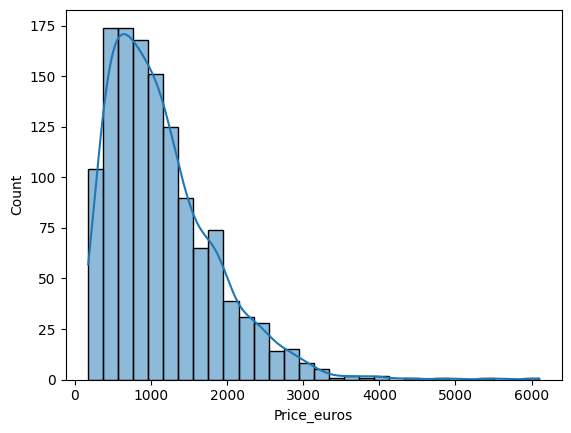

In [8]:
# Distribusi harga
sns.histplot(df['Price_euros'], bins=30, kde=True)

Berdasarkan hasil grafik histplot di atas, terlihat bahwa distribusi feature Price_euros merupakan skewed positif dengan 1 tail ke kanan yang di mana harga yang paling mahal jatuh di harga 6000. Lalu pada data juga terlihat paling banyak ada di harga 500-1500. Dari grafik juga terlihat banyak laptop dengan harga murah yang di mana target nya adalah orang-orang masih banyak yang memilih laptop dengan harga yang murah.

## Distribusi Laptop Berdasarkan TypeName
---

<Axes: >

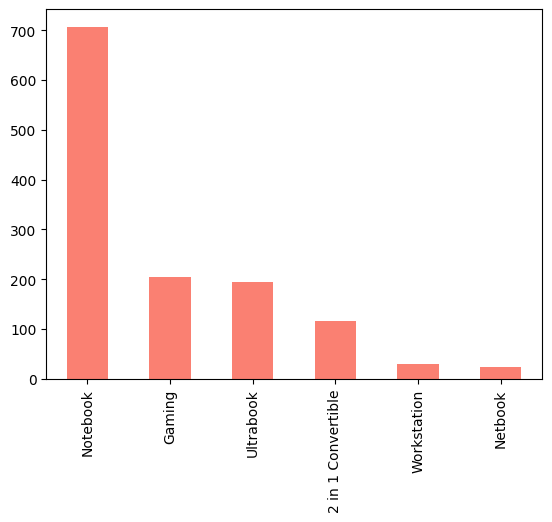

In [9]:
# Visualisasi distribusi feature TypeName
df['TypeName'].value_counts().plot(kind='bar', color='salmon')


Berdasarkan visualisasi di atas, membandingkan kuantitas antar TypeName laptop. Di dapat bahwa Notebook paling populer dari yang lain karena perbedaan jumlah yang signifikan dengan menyentuh di angka 700 di mana notebook ini kemungkinan sering digunakan oleh orang yang hanya untuk kebutuhan pekerjaan saja mungkin, dan yang paling sedikit datanya yaitu Netbook yang menyentuh di angka sekitar 25.

## Distribusi Jenis Screen Laptop
---

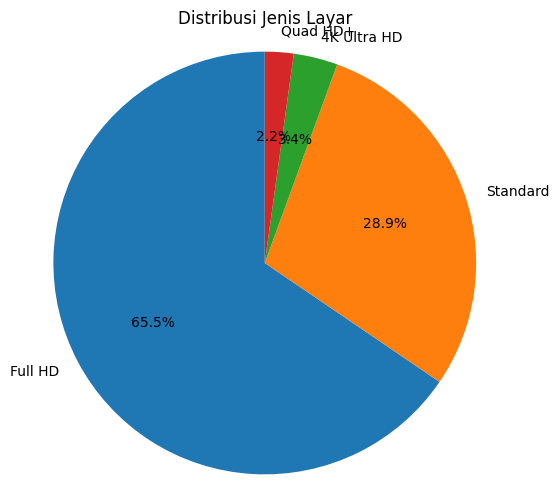

In [10]:
# Contoh data
screen_counts = df['Screen'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(screen_counts, labels=screen_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Jenis Layar')
plt.axis('equal')  # agar pie-nya bulat
plt.show()


Dengan pie chart di atas ingin mengetahui persentase data screen. Dari di atas didapat screen Full HD meraih persentase terbanyak dengan 65.5% yang di mana Full HD adalah screen paling umum atau paling populer di pasaran. Lalu Pada screen Standard meraih 29.0% meraih posisi ke 2 yang di mana kemungkinan masih banyak orang menggunakannya karena harga yang murah. 

## Perbandingan Distribusi Harga dengan Fitur-Fitur Layar antara 2 kelompok
---

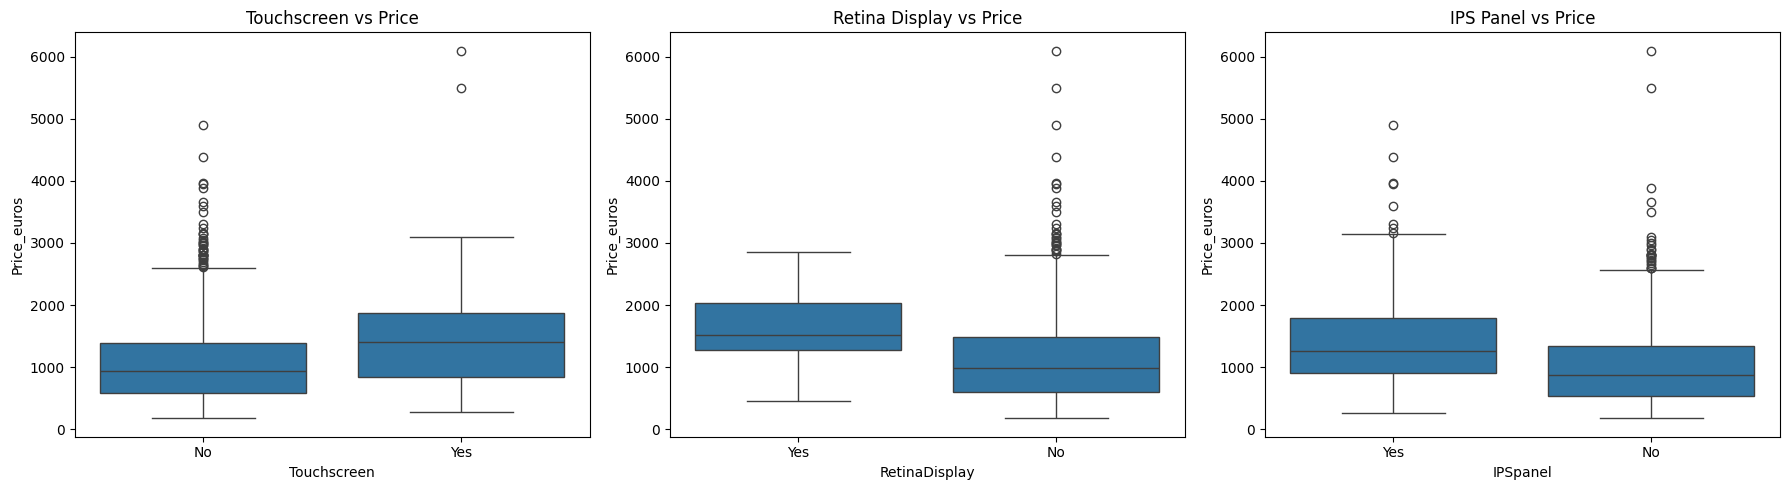

In [11]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 baris, 3 kolom

sns.boxplot(data=df, x='Touchscreen', y='Price_euros', ax=axes[0])
axes[0].set_title('Touchscreen vs Price')

sns.boxplot(data=df, x='RetinaDisplay', y='Price_euros', ax=axes[1])
axes[1].set_title('Retina Display vs Price')

sns.boxplot(data=df, x='IPSpanel', y='Price_euros', ax=axes[2])
axes[2].set_title('IPS Panel vs Price')

plt.tight_layout()
plt.show()


Laptop yang ada layar sentuhnya (Touchscreen: Yes) cenderung punya harga lebih mahal daripada yang tidak. tetapi dua-duanya tetap punya rentang harga yang lebar, jadi tidak semua laptop yang touchscreen mahal.

Lalu laptop yang pakai Retina Display juga kelihatan punya harga rata-rata lebih tinggi. Retina ini biasanya dipakai di laptop kelas atas, karena itu harganya pun ikut naik.

Lalu laptop yang  memakai panel IPS juga kelihatan sedikit lebih mahal dibandingkan yang tidak. Tetapi perbedaan harganya tidak terlalu jauh, jadi masih tergantung faktor lain juga.

## Mengetahui Apakah CPU_company == GPU_company
---

In [12]:
# copy df ke df1
df1 = df.copy()

Dilakukan copy data untuk menambah kolom baru agar data yang df tidak menambah kolom.

In [13]:
# Membandingkan CPU_company dan GPU_company dalam bentuk boolean
df1['same_CPU_GPU_company'] = df1['CPU_company'] == df1['GPU_company']

# Menampilkan jumlah data
df1['same_CPU_GPU_company'].value_counts()


True     764
False    511
Name: same_CPU_GPU_company, dtype: int64

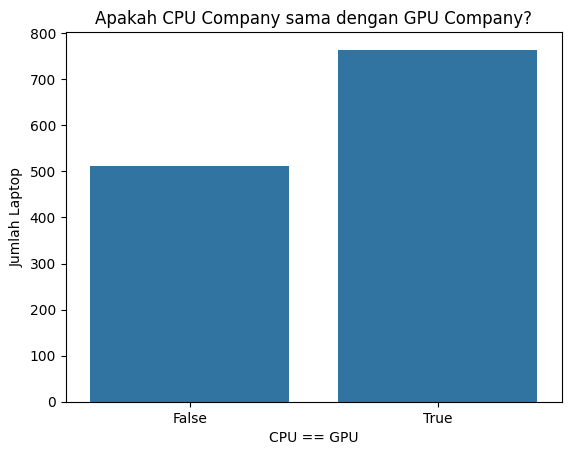

In [14]:
# Visualisasi CPU_company == GPU_company
sns.countplot(data=df1, x='same_CPU_GPU_company')
plt.title('Apakah CPU Company sama dengan GPU Company?')
plt.xlabel('CPU == GPU')
plt.ylabel('Jumlah Laptop')
plt.show()


Dengan membandingkan data seperti di atas ingin mengetahui apakah CPU Company sama dengan GPU Company. Berdasarkan chart di atas dapat diketahui bahwa keduanya iya sebanyak 750an laptop dan yang tidak sekitar 510an data. Dari sini kita tahu bahwa banyak company yang mengeluarkan CPU dan GPU untuk laptop dan juga 750an laptop memliki CPU dan GPU dari company yang sama.

## Hubungan antara TotalStorage dengan Price_euros
---

<Axes: xlabel='TotalStorage', ylabel='Price_euros'>

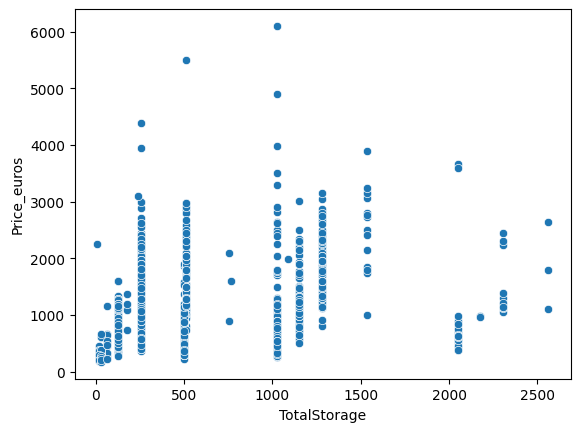

In [15]:
# Menjumlahkan storage dari PrimaryStorage dan SecondaryStorage
df1['TotalStorage'] = df1['PrimaryStorage'] + df1['SecondaryStorage']

# Visualisasi hubungan dengan scatter plot
sns.scatterplot(data=df1, x='TotalStorage', y='Price_euros')

Berdasarkan scatter plot antara TotalStorage dan Price (euros), terlihat bahwa tidak ada hubungan yang kuat atau pola yang jelas antara kapasitas penyimpanan total dan harga laptop. Beberapa laptop dengan storage kecil justru memiliki harga yang sangat tinggi, sedangkan ada juga laptop dengan storage besar tetapi harganya relatif murah. Dengan ini menunjukkan bahwa total kapasitas penyimpanan bukan satu-satunya faktor utama yang menentukan harga laptop.

## Rata-Rata Harga Laptop Berdasarkan OS dan RAM
---

In [16]:
# Mengetahui rata-rata harga berdasarkan OS dan Ram
grouped = df.groupby(['OS', 'Ram'])['Price_euros'].mean().reset_index().sort_values(by='Price_euros', ascending=False)
grouped = grouped.reset_index(drop=True)
grouped['label'] = grouped['OS'] + ' | ' + grouped['Ram'].astype(str) + 'GB'
grouped

,OS,Ram,Price_euros,label
0,Windows 10,64,3975.000000,Windows 10 | 64GB
1,Windows 10,32,3413.085882,Windows 10 | 32GB
2,Windows 7,16,2840.400000,Windows 7 | 16GB
3,macOS,16,2611.806667,macOS | 16GB
4,Windows 10 S,16,2589.000000,Windows 10 S | 16GB
5,Windows 7,12,2299.000000,Windows 7 | 12GB
6,Windows 10,24,2206.333333,Windows 10 | 24GB
7,Chrome OS,16,2199.000000,Chrome OS | 16GB
8,Mac OS X,16,2139.970000,Mac OS X | 16GB
9,Windows 10,16,1921.136758,Windows 10 | 16GB


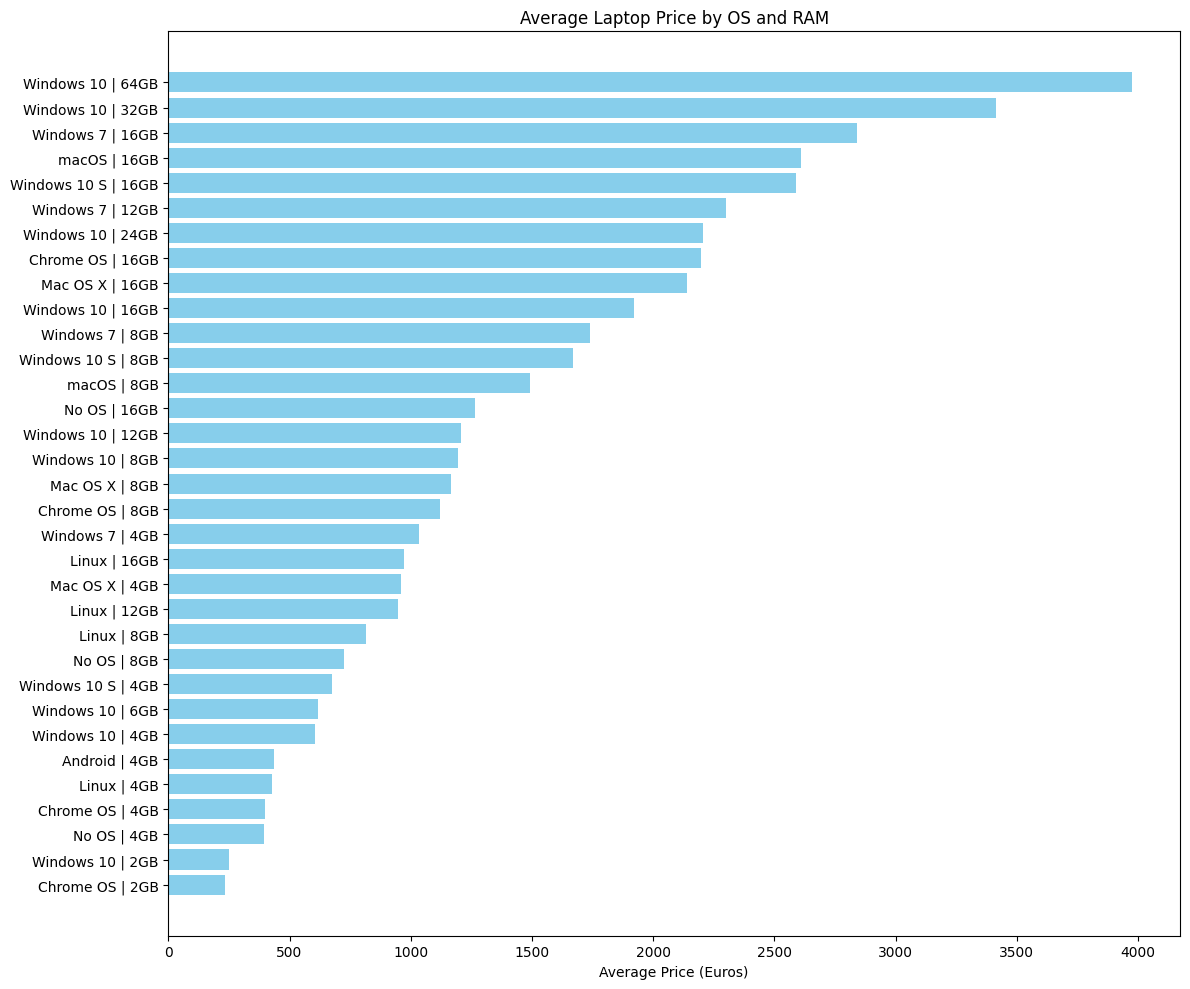

In [17]:
# Visualisasi rata-rata harga laptop berdasarkan OS dan RAM
plt.figure(figsize=(12,10))
plt.barh(grouped['label'], grouped['Price_euros'], color='skyblue')
plt.xlabel('Average Price (Euros)')
plt.title('Average Laptop Price by OS and RAM')
plt.tight_layout()
plt.gca().invert_yaxis()  # Biar urutan tertinggi di atas
plt.show()

Berdasarkan grafik di atas terlihat bahwa kombinasi sistem operasi Windows 10 dengan kapasitas RAM 64GB dan 32GB merupakan yang paling umum ditemukan. Secara umum, laptop dengan Windows dan RAM tinggi mendominasi pasar, sementara sistem operasi lain seperti Linux, Chrome OS, dan Android lebih banyak ditemukan pada laptop dengan RAM yang lebih kecil. Ini menunjukkan bahwa laptop dengan spesifikasi tinggi umumnya menggunakan Windows sebagai OS utamanya.

## Rata-Rata Harga Berdasarkan PrimaryStorageType, SecondaryStorageType
---

In [18]:
# Menggabungkan kolom
df1_group = df1.groupby(['PrimaryStorageType', 'SecondaryStorageType']).agg(
    TotalStorage_Count=('TotalStorage', 'sum'),  # Menghitung jumlah
    Average_Price=('Price_euros', 'mean')             # Menghitung rata-rata harga
).reset_index().sort_values(by='TotalStorage_Count', ascending=False)  # Mengurutkan berdasarkan jumlah
df1_group = df1_group.reset_index(drop=True)
df1_group

,PrimaryStorageType,SecondaryStorageType,TotalStorage_Count,Average_Price
0,HDD,No,316112,658.504441
1,SSD,HDD,263912,1613.456450
2,SSD,No,189100,1316.405975
3,Hybrid,No,7676,875.935000
4,Flash Storage,No,5680,524.308857
5,SSD,Hybrid,2816,2994.995000
6,SSD,SSD,2816,1420.990000
7,HDD,HDD,2048,621.450000
8,Flash Storage,HDD,1088,1993.000000


In [19]:
# Visualisasi Rata-Rata Harga Berdasarkan PrimaryStorageType, SecondaryStorageType
fig = px.bar(df1_group,
             x='PrimaryStorageType',
             y='Average_Price',
             color='SecondaryStorageType',
             title='Rata-rata Harga berdasarkan Jenis Penyimpanan Primer dan Sekunder',
             labels={'Average_Price': 'Rata-rata Harga (Euro)',
                     'PrimaryStorageType': 'Primary Storage Type',
                     'SecondaryStorageType': 'Secondary Storage Type'},
             text='TotalStorage_Count')  # Menampilkan TotalStorage_Count sebagai teks

fig.update_layout(xaxis_tickangle=-45,
                  uniformtext_minsize=8,
                  uniformtext_mode='hide') # Mengatur ukuran dan mode tampilan teks
fig.show()

Berdasarkan grafik di atas, terlihat bahwa laptop dengan penyimpanan primer SSD memiliki rata-rata harga tertinggi, terutama jika dipasangkan dengan secondary storage tipe Hybrid atau SSD juga. Sebaliknya, kombinasi HDD sebagai penyimpanan utama cenderung memiliki harga rata-rata yang paling rendah. Hal ini menunjukkan bahwa SSD, terutama jika digabung dengan storage tambahan, lebih umum digunakan pada laptop kelas atas atau premium.

## Korelasi antara Inches, ScreenW, ScreenH dan Price_euros

<Axes: >

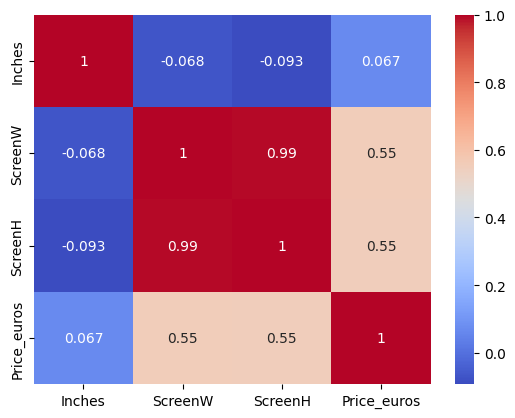

In [20]:
# Visualisasi korelasi

sns.heatmap(df[['Inches', 'ScreenW', 'ScreenH', 'Price_euros']].corr(), annot=True, cmap='coolwarm')


Berdasarkan heatmap korelasi, Screen Width (ScreenW) dan Screen Height (ScreenH) memiliki korelasi sangat kuat satu sama lain (0.99) dan juga menunjukkan hubungan positif sedang dengan Price (0.55). Sementara itu, ukuran layar dalam inci (Inches) hampir tidak berkorelasi dengan harga. Ini menunjukkan bahwa resolusi layar (bukan ukuran fisik) lebih berpengaruh terhadap harga laptop.

# V. Feature Engineering
---

## Handling Features Based on Discovery in Loading Data
---

Pada section ini dilakukan handling features yang ditemukan di data loading.

### 1. Mapping
---

In [21]:
mapping = {
    2: 1,
    4: 2,
    6: 3,
    8: 4,
    12: 5,
    16: 6,
    24: 7,
    32: 8,
    64: 9
}

df['Ram_category'] = df['Ram'].map(mapping)
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Ram_category
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,4
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,4
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,4
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,6
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520,2
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520,6
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics,1
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330,3


In [22]:
# Mengetahui jumlah value pada PrimaryStorage
df['PrimaryStorage'].value_counts()

256     508
1024    240
128     175
512     136
500     124
32       43
2048     16
64       15
16       10
180       5
240       1
8         1
508       1
Name: PrimaryStorage, dtype: int64

Setelah didapat hasil di atas, untuk dilakukan ordinal encode dilakukan drop untuk ukuran primary storage 508, 8, 240, dan 180. Dilakukan drop ini agar feature ini tidak menjadi high cardinality yang dapat merusak model.

Untuk 508gb primary storage tidak ada di laptop jadi kemungkinan ada salah ketik yang harusnya 500.

Lalu pada 8gb karena hanya ada 1 data maka dilakukan drop, karena jika tetap dipertahankan akan mempengaruhi model. Lalu pada 240gb saya drop karena setelah saya cek dan cari untuk primary storage ukuran segitu tidak ada, dan saya lakukan drop juga karena jika datanya tetap dipertahankan akan mempengaruhi modelnya dan ukuran 240gb juga adanya di secondary storage jadi ada kemungkinan salah input ke primary storage.

Lalu pada 180gb saya lakukan drop karena untuk 180gb ini saya cek dan cari tidak ada di primary storage, untuk ukuran 180gb adanya untuk secondarystorage, jadi kemungkinan ada kesalahan input data harusnya di secondary storage tapi masuk ke primary storage.



In [23]:
# Nilai yang dihapus
nilai_dihapus = [8, 508, 240, 180]

# Menghapus baris di mana primarystorage bernilai di daftar
df = df[~df['PrimaryStorage'].isin(nilai_dihapus)]

df['PrimaryStorage'].unique()

array([ 128,  256,  512,  500, 1024,   32,   64, 2048,   16], dtype=int64)

In [24]:
mapping = {
    16: 1,
    32: 2,
    64: 3,
    128: 4,
    256: 5,
    500: 6,
    512: 7,
    1024: 8,
    2048: 9
}

df['PrimaryStorage_category'] = df['PrimaryStorage'].map(mapping)
print(df)

     Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6   

      Ram          OS  Weig

In [25]:
mapping = {
    0: 1,
    256: 2,
    500: 3,
    512: 4,
    1024: 5,
    2048: 6
}

df['SecondaryStorage_category'] = df['SecondaryStorage'].map(mapping)
print(df)

     Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6   

      Ram          OS  Weig

Untuk ketiga kolom itu terdapat 2 kolom yang sama, tetapi pada FE akan menggunakan kolom yang category nya saja dan Feature yang bukan kategori akan di hapus karena yang category juga berdasarkan dari feature yang awal.

In [26]:
# Menghapus feature Ram, PrimaryStorage, dan SecondaryStorage

df = df.drop(columns=['Ram', 'PrimaryStorage', 'SecondaryStorage'])
df.head(2)

,Company,Product,TypeName,Inches,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,CPU_company,CPU_freq,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Ram_category,PrimaryStorage_category,SecondaryStorage_category
0,Apple,MacBook Pro,Ultrabook,13.3,macOS,1.37,1339.69,Standard,2560,1600,...,Intel,2.3,Core i5,SSD,No,Intel,Iris Plus Graphics 640,4,4,1
1,Apple,Macbook Air,Ultrabook,13.3,macOS,1.34,898.94,Standard,1440,900,...,Intel,1.8,Core i5,Flash Storage,No,Intel,HD Graphics 6000,4,4,1


Setelah feature Ram, PrimaryStorage, dan SecondaryStorage dihapus dan sudah ada feature yang baru berdasarkan kategory, selannjutnya kita akan cek tipe data dari feature baru apakah numerikal atau kategorikal. Jika numerikal, maka akan kita ubah tipe datanya menjad string agar saat dilakukan encode feature tersebut dapat terdeteksi.

In [27]:
# Mengubah tipe data menjadi string
df['Ram_category'] = df['Ram_category'].astype(str)
df['PrimaryStorage_category'] = df['PrimaryStorage_category'].astype(str)
df['SecondaryStorage_category'] = df['SecondaryStorage_category'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1267 non-null   object 
 1   Product                    1267 non-null   object 
 2   TypeName                   1267 non-null   object 
 3   Inches                     1267 non-null   float64
 4   OS                         1267 non-null   object 
 5   Weight                     1267 non-null   float64
 6   Price_euros                1267 non-null   float64
 7   Screen                     1267 non-null   object 
 8   ScreenW                    1267 non-null   int64  
 9   ScreenH                    1267 non-null   int64  
 10  Touchscreen                1267 non-null   object 
 11  IPSpanel                   1267 non-null   object 
 12  RetinaDisplay              1267 non-null   object 
 13  CPU_company                1267 non-null   objec

### ScreenW, ScreenH, Inches
---

Pada penemuan di data loading, untuk ScreenW, ScreenH akan dilakukan penghapusan feature karena kedua feature itu sudah diwakilkan di Inches karena Inches ini didapat adalah panjang diagonal yang didapat dari perhitungan Width dan Length nya.

In [28]:
df = df.drop(columns=['ScreenW', 'ScreenH'])
df.head(2)

,Company,Product,TypeName,Inches,OS,Weight,Price_euros,Screen,Touchscreen,IPSpanel,...,CPU_company,CPU_freq,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Ram_category,PrimaryStorage_category,SecondaryStorage_category
0,Apple,MacBook Pro,Ultrabook,13.3,macOS,1.37,1339.69,Standard,No,Yes,...,Intel,2.3,Core i5,SSD,No,Intel,Iris Plus Graphics 640,4,4,1
1,Apple,Macbook Air,Ultrabook,13.3,macOS,1.34,898.94,Standard,No,No,...,Intel,1.8,Core i5,Flash Storage,No,Intel,HD Graphics 6000,4,4,1


## Cek Cardinality
---

Cardinility dilakukan untuk mengetahui seberapa banyak nilai unik atau variasi di kolom kategorikal.

In [29]:
# Cek Cardinality
pd.set_option('display.max_colwidth', None)
cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols: 
    listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Company,19,"[Apple, HP, Acer, Asus, Dell, Lenovo, Chuwi, MSI, Microsoft, Toshiba, Huawei, Xiaomi, Vero, Razer, Mediacom, Samsung, Google, Fujitsu, LG]"
1,Product,616,"[MacBook Pro, Macbook Air, 250 G6, Aspire 3, ZenBook UX430UN, Swift 3, Inspiron 3567, MacBook 12"", IdeaPad 320-15IKB, XPS 13, Vivobook E200HA, Legion Y520-15IKBN, 255 G6, Inspiron 5379, 15-BS101nv (i7-8550U/8GB/256GB/FHD/W10), MacBook Air, Inspiron 5570, Latitude 5590, ProBook 470, LapBook 15.6"", E402WA-GA010T (E2-6110/2GB/32GB/W10), 17-ak001nv (A6-9220/4GB/500GB/Radeon, IdeaPad 120S-14IAP, Inspiron 5770, ProBook 450, X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux), Inspiron 7577, X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce, Aspire A515-51G, Inspiron 7773, IdeaPad 320-15ISK, Rog Strix, X751NV-TY001T (N4200/4GB/1TB/GeForce, Yoga Book, ProBook 430, Inspiron 3576, 15-bs002nv (i3-6006U/4GB/128GB/FHD/W10), VivoBook Max, GS73VR 7RG, X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux), Vostro 5471, IdeaPad 520S-14IKB, UX410UA-GV350T (i5-8250U/8GB/256GB/FHD/W10), ZenBook Pro, Stream 14-AX040wm, V310-15ISK (i5-7200U/4GB/1TB/FHD/W10), FX753VE-GC093 (i7-7700HQ/12GB/1TB/GeForce, Surface Laptop, Inspiron 5370, GL72M 7RDX, Aspire E5-475, FX503VD-E4022T (i7-7700HQ/8GB/1TB/GeForce, IdeaPad 320-15IKBN, Aspire A515-51G-32MX, ProBook 440, IdeaPad 320-15AST, Pavilion 15-CK000nv, FX503VM-E4007T (i7-7700HQ/16GB/1TB, FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon, Aspire 5, Probook 430, Zenbook UX430UA, Spin 5, X541UV-DM1439T (i3-7100U/6GB/256GB/GeForce, Omen 15-ce007nv, 15-bs017nv (i7-7500U/8GB/256GB/Radeon, 15-bw000nv (E2-9000e/4GB/500GB/Radeon, Envy 13-ad009n, Pavilion 14-BK001nv, Ideapad 310-15ISK, UX430UQ-GV209R (i7-7500U/8GB/256GB/GeForce, GP62M 7REX, Thinkpad T470, VivoBook S15, ThinkPad Yoga, Probook 440, Spectre x360, Inspiron 7570, X705UV-BX074T (i3-6006U/4GB/1TB/GeForce, Spin 3, GS63VR 7RG, Probook 470, E402WA-GA007T (E2-6110/4GB/64GB/W10, Inspiron 5567, Aspire A515-51G-37JS, 15-BS078nr (i7-7500U/8GB/1TB/W10), V110-15IAP (N3350/4GB/1TB/No, FX753VD-GC086T (i5-7300HQ/8GB/1TB, Envy 13-AD007nv, ThinkPad E480, Satellite Pro, ZenBook UX430UA, EliteBook Folio, X541NA (N3350/4GB/1TB/FHD/W10), GE72MVR 7RG, Aspire A315-51, Inspiron 5577, Inspiron 7567, V110-15IKB (i5-7200U/4GB/128GB/W10), GE73VR 7RE, ...]"
2,TypeName,6,"[Ultrabook, Notebook, Netbook, Gaming, 2 in 1 Convertible, Workstation]"
3,OS,9,"[macOS, No OS, Windows 10, Mac OS X, Linux, Android, Windows 10 S, Chrome OS, Windows 7]"
4,Screen,4,"[Standard, Full HD, Quad HD+, 4K Ultra HD]"
5,Touchscreen,2,"[No, Yes]"
6,IPSpanel,2,"[Yes, No]"
7,RetinaDisplay,2,"[Yes, No]"
8,CPU_company,3,"[Intel, AMD, Samsung]"
9,CPU_model,93,"[Core i5, Core i5 7200U, Core i7, A9-Series 9420, Core i7 8550U, Core i5 8250U, Core i3 6006U, Core M m3, Core i7 7500U, Core i3 7100U, Atom x5-Z8350, Core i5 7300HQ, E-Series E2-9000e, Core i7 8650U, Atom x5-Z8300, E-Series E2-6110, A6-Series 9220, Celeron Dual Core N3350, Core i3 7130U, Core i7 7700HQ, Ryzen 1700, Pentium Quad Core N4200, Atom x5-Z8550, Celeron Dual Core N3060, FX 9830P, Core i7 7560U, E-Series 6110, Core i5 6200U, Core M 6Y75, Core i5 7500U, Core i7 6920HQ, Core i5 7Y54, Core i7 7820HK, Xeon E3-1505M V6, Core i7 6500U, E-Series 9000e, A10-Series A10-9620P, A6-Series A6-9220, Core i7 6600U, Celeron Dual Core 3205U, Core i7 7820HQ, A10-Series 9600P, Core i7 7600U, A8-Series 7410, Celeron Dual Core 3855U, Pentium Quad Core N3710, A12-Series 9720P, Core i5 7300U, Celeron Quad Core N3450, Core i5 6440HQ, Core i7 6820HQ, Ryzen 1600, Core i7 7Y75, Core i5 7440HQ, Core i7 7660U, Core M m3-7Y30, Core i5 7Y57, Core i7 6700HQ, Core i3 6100U, A10-Series 9620P, E-Series 7110, A9-Series A9-9420, Core i7 6820HK, Core M 7Y30, Xeon E3-1535M v6, Celeron Quad Core N3160, Core i5 6300U, E-Series E2-9000, Celeron Dual Core N3050, Core M M3-6Y30, Core i5 6300HQ, A6-Series 7310, Atom Z8350, Xeon E3-1535M v5, Core i5 6260U, Pentium Dual Core N4200, Celeron Quad Core N3710, Core M, A12-Serie

Berdasarkan di atas terdapat 14 feature kategorikal yang di mana 4 feature di antaranya merupakan high cardinality, yaitu Company, Product, CPU_model dan GPU_model. Sisa featurenya merupakan low cardinality <= 5 jumlah nilai unik nya dan < 10 untuk medium cardinality.

Lalu pada fitur Product akan dilakukan drop, karena sudah direpresentasikan oleh fitur Company 

#### Cardinality Handling
---

In [30]:
# Mengecek value fitur Company
df['Company'].value_counts()

Dell         291
Lenovo       283
HP           266
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

Setelah dilihat, untuk handling cardinality akan mengambil dari Company 8 teratas saja dan sisanya akan dijadikan others.

In [31]:
# Hitung  company teratas berdasarkan frekuensi
top_8 = df['Company'].value_counts().nlargest(8).index

# Mapping: selain top 8 jadi 'Others'
df['Company_name'] = df['Company'].apply(lambda x: x if x in top_8 else 'Others')

df['Company_name'].unique()


array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Others', 'MSI',
       'Toshiba'], dtype=object)

Setelah dilakukan handling pada company, selanjutnya melakukan handling pada CPU Performance. Pada CPU Performance ini dilakukan mapping berdasarkan performance dari CPU dengan kategori Low, Medium, dan High.

In [32]:
# Mapping CPU Performance
CPU_Performance = {
    'Low' : ['Core M m3', 'Atom x5-Z8350', 'E-Series E2-9000e', 'Atom x5-Z8300', 'E-Series E2-6110',
            'A6-Series 9220', 'Celeron Dual Core N3350', 'Pentium Quad Core N4200', 'Atom x5-Z8550',
            'Celeron Dual Core N3060', 'E-Series 6110', 'Core M 6Y75', 'E-Series 9000e',
            'A6-Series A6-9220', 'Celeron Dual Core 3205U', 'Celeron Dual Core 3855U',
            'Pentium Quad Core N3710', 'Celeron Quad Core N3450', 'Core M m3-7Y30',
            'E-Series 7110', 'Core M 7Y30', 'Celeron Quad Core N3160', 'E-Series E2-9000',
            'Celeron Dual Core N3050', 'Core M M3-6Y30', 'A6-Series 7310', 'Atom Z8350',
            'Pentium Dual Core N4200', 'Celeron Quad Core N3710', 'Core M',
            'Pentium Dual Core 4405U', 'A4-Series 7210', 'Core M m7-6Y75', 'Core M M7-6Y75',
            'Atom X5-Z8350', 'Pentium Dual Core 4405Y', 'Pentium Quad Core N3700',
            'Core M 6Y54', 'Cortex A72&A53', 'E-Series 9000', 'Core M 6Y30'],
    
    'Medium' : ['Core i5', 'Core i5 7200U', 'A9-Series 9420', 'Core i5 8250U', 'Core i3 6006U',
                'Core i3 7100U', 'Core i5 7300HQ', 'Core i3 7130U', 'Ryzen 1700', 'Core i5 6200U',
                'Core i5 7500U', 'Core i5 7Y54', 'Xeon E3-1505M V6', 'A10-Series A10-9620P',
                'A10-Series 9600P', 'A8-Series 7410', 'A12-Series 9720P', 'Core i5 7300U',
                'Core i5 6440HQ', 'Ryzen 1600', 'Core i5 7440HQ', 'Core i5 7Y57', 'Core i3 6100U',
                'A10-Series 9620P', 'A9-Series A9-9420', 'Xeon E3-1535M v6', 'Core i5 6300U',
                'Core i5 6300HQ', 'Xeon E3-1535M v5', 'Core i5 6260U', 'A12-Series 9700P',
                'FX 8800P', 'A9-Series 9410'],
                
    'High' : ['Core i7', 'Core i7 8550U', 'Core i7 7500U', 'Core i7 8650U', 'Core i7 7700HQ',
                'FX 9830P', 'Core i7 7560U', 'Core i7 6920HQ', 'Core i7 7820HK', 'Core i7 6500U',
                'Core i7 6600U', 'Core i7 7820HQ', 'Core i7 7600U', 'Core i7 6820HQ', 'Core i7 7Y75',
                'Core i7 7660U', 'Core i7 6700HQ', 'Core i7 6820HK', 'Core i7 6560U']
}


In [33]:
# Function untuk menentukan CPU performance
def penentuan_cpu_perf(cpu_list):
    result = []
    for cpu in cpu_list:
        found = False
        for perf, cpu_perf in CPU_Performance.items():
            if cpu in cpu_perf:
                result.append(perf)
                found = True
                break
        if not found:
            result.append('Unknown')
    return result


In [34]:
# Membuat feature CPU Performance berdasarkan mapping
df['CPU_performance'] = penentuan_cpu_perf(df['CPU_model'].tolist())
df.head()

,Company,Product,TypeName,Inches,OS,Weight,Price_euros,Screen,Touchscreen,IPSpanel,...,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Ram_category,PrimaryStorage_category,SecondaryStorage_category,Company_name,CPU_performance
0,Apple,MacBook Pro,Ultrabook,13.3,macOS,1.37,1339.69,Standard,No,Yes,...,Core i5,SSD,No,Intel,Iris Plus Graphics 640,4,4,1,Apple,Medium
1,Apple,Macbook Air,Ultrabook,13.3,macOS,1.34,898.94,Standard,No,No,...,Core i5,Flash Storage,No,Intel,HD Graphics 6000,4,4,1,Apple,Medium
2,HP,250 G6,Notebook,15.6,No OS,1.86,575.00,Full HD,No,No,...,Core i5 7200U,SSD,No,Intel,HD Graphics 620,4,5,1,HP,Medium
3,Apple,MacBook Pro,Ultrabook,15.4,macOS,1.83,2537.45,Standard,No,Yes,...,Core i7,SSD,No,AMD,Radeon Pro 455,6,7,1,Apple,High
4,Apple,MacBook Pro,Ultrabook,13.3,macOS,1.37,1803.60,Standard,No,Yes,...,Core i5,SSD,No,Intel,Iris Plus Graphics 650,4,5,1,Apple,Medium


Setelah dilakukan handling pada CPU Performance, selanjutnya melakukan handling pada GPU Performance. Pada GPU Performance ini dilakukan mapping berdasarkan performance dari GPU dengan kategori Low, Medium, dan High.

In [35]:
# Pengelompokkan GPU Performance
GPU_performance = {
    'Low' : ['HD Graphics 400', 'HD Graphics 405', 'HD Graphics 500', 'HD Graphics 505',
        'HD Graphics 510', 'HD Graphics 515', 'HD Graphics 520', 'HD Graphics 530',
        'HD Graphics 5300', 'HD Graphics 540', 'HD Graphics 6000', 'HD Graphics 615',
        'HD Graphics 620', 'HD Graphics 620 ', 'HD Graphics', 'UHD Graphics 620', 'Graphics 620',
        'Iris Graphics 540', 'Iris Graphics 550', 'Iris Plus Graphics 640', 'Iris Plus Graphics 650',
        'Iris Pro Graphics', 'Radeon R2', 'Radeon R2 Graphics', 'Radeon R3', 'Radeon R4', 'Radeon R4 Graphics',
        'Radeon R5', 'Radeon R5 M315', 'Radeon R5 M330', 'Radeon R5 M420', 'Radeon R5 M420X',
        'Radeon R5 M430', 'Radeon R5 430', 'Radeon R5 520', 'Radeon R7', 'Radeon R7 M360', 'Radeon R7 M365X', 
        'Radeon R7 M440','Radeon R7 M445', 'Radeon R7 M460', 'Radeon R7 M465', 'Radeon R7 Graphics',
        'GeForce 920', 'GeForce 920M', 'GeForce 920MX', 'GeForce 920MX ', 'R4 Graphics',
        'GeForce 930M', 'GeForce 930MX', 'GeForce 930MX ', 'GeForce 940M',
        'GeForce 940MX', 'GeForce GT 940MX', 'Mali T860 MP4', 'R17M-M1-70'],

    'Medium' : ['GeForce GTX 950M', 'GeForce GTX 960M', 'GeForce GTX 965M',
        'GeForce GTX 1050', 'GeForce GTX 1050M', 'GeForce GTX 1050 Ti',
        'GeForce GTX 1050Ti', 'GeForce GTX 930MX', 'GeForce MX130', 'GeForce MX150',
        'GeForce 150MX','Radeon 520', 'Radeon 530', 'Radeon 540', 'Radeon RX 540',
        'Radeon RX 550', 'Radeon RX 560','Quadro M520M', 'Quadro M500M',
        'Quadro M1000M', 'Quadro M1200', 'Quadro M2000M', 'Quadro M2200', 'Quadro M2200M',
        'Quadro M620', 'Quadro M620M', 'FirePro W4190M', 'FirePro W4190M ', 'FirePro W5130M',
        'Radeon Pro 455', 'Radeon Pro 555', 'Radeon Pro 560', 'GeForce GTX 940MX', 
        'GeForce GTX 940M', 'GeForce 960M', 'HD Graphics 630', 'Radeon R9 M385'],

    'High' : ['GeForce GTX 960', 'GeForce GTX 960<U+039C>', 'GeForce GTX 970M',
        'GeForce GTX 980', 'GeForce GTX 980 ', 'GeForce GTX 980M', 'GeForce GTX1050 Ti',
        'GeForce GTX 1060', 'GeForce GTX1060', 'GeForce GTX 1070', 'GeForce GTX1050 Ti',
        'GeForce GTX 1070M', 'GeForce GTX 1080', 'GeForce GTX1080',
        'Radeon RX 580', 'FirePro W6150M', 'Quadro 3000M', 'Quadro M3000M', 'GTX 980 SLI',
        'GeForce GTX 1060']
}

In [36]:
# Function untuk menentukan GPU performance
def penentuan_gpu_perf(gpu_list):
    result = []
    for gpu in gpu_list:
        found = False
        for perf, gpu_perf in GPU_performance.items():
            if gpu in gpu_perf:
                result.append(perf)
                found = True
                break
        if not found:
            result.append('Unknown')
    return result


In [37]:
# Membuat feature GPU Performance berdasarkan mapping
df['GPU_performance'] = penentuan_gpu_perf(df['GPU_model'].tolist())
df.head()

,Company,Product,TypeName,Inches,OS,Weight,Price_euros,Screen,Touchscreen,IPSpanel,...,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Ram_category,PrimaryStorage_category,SecondaryStorage_category,Company_name,CPU_performance,GPU_performance
0,Apple,MacBook Pro,Ultrabook,13.3,macOS,1.37,1339.69,Standard,No,Yes,...,SSD,No,Intel,Iris Plus Graphics 640,4,4,1,Apple,Medium,Low
1,Apple,Macbook Air,Ultrabook,13.3,macOS,1.34,898.94,Standard,No,No,...,Flash Storage,No,Intel,HD Graphics 6000,4,4,1,Apple,Medium,Low
2,HP,250 G6,Notebook,15.6,No OS,1.86,575.00,Full HD,No,No,...,SSD,No,Intel,HD Graphics 620,4,5,1,HP,Medium,Low
3,Apple,MacBook Pro,Ultrabook,15.4,macOS,1.83,2537.45,Standard,No,Yes,...,SSD,No,AMD,Radeon Pro 455,6,7,1,Apple,High,Medium
4,Apple,MacBook Pro,Ultrabook,13.3,macOS,1.37,1803.60,Standard,No,Yes,...,SSD,No,Intel,Iris Plus Graphics 650,4,5,1,Apple,Medium,Low


Setelah melakukan handling cardinality dengan feature creation, selanjutnya perlu menghapus feature yang lama agar feature tidak ganda.

In [38]:
# Menghapus feature Company, CPU_model, dan GPU_model
df = df.drop(columns=['Company', 'Product', 'CPU_model', 'GPU_model'])

# additional setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.head(2)

,TypeName,Inches,OS,Weight,Price_euros,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorageType,SecondaryStorageType,GPU_company,Ram_category,PrimaryStorage_category,SecondaryStorage_category,Company_name,CPU_performance,GPU_performance
0,Ultrabook,13.3,macOS,1.37,1339.69,Standard,No,Yes,Yes,Intel,2.3,SSD,No,Intel,4,4,1,Apple,Medium,Low
1,Ultrabook,13.3,macOS,1.34,898.94,Standard,No,No,No,Intel,1.8,Flash Storage,No,Intel,4,4,1,Apple,Medium,Low


## Splitting Antara X (Features) and Y (Target)
---

In [39]:
# Splitting antara X dan Y
X = df.drop(['Price_euros'], axis=1)
y = df['Price_euros']

X.head(2)

,TypeName,Inches,OS,Weight,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorageType,SecondaryStorageType,GPU_company,Ram_category,PrimaryStorage_category,SecondaryStorage_category,Company_name,CPU_performance,GPU_performance
0,Ultrabook,13.3,macOS,1.37,Standard,No,Yes,Yes,Intel,2.3,SSD,No,Intel,4,4,1,Apple,Medium,Low
1,Ultrabook,13.3,macOS,1.34,Standard,No,No,No,Intel,1.8,Flash Storage,No,Intel,4,4,1,Apple,Medium,Low


### Splitting Antara Train Set dan Test Set
---

In [40]:
# Splitting training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (1076, 19)
Test Size (191, 19)


Pada splitting train dan test set dipisahkan sebesar 85% untuk train test dan 15% untuk test set.

## Handling Outliers
---

Pada section ini dilakukan handling outliers yang dapat mengganggu proses analisis dan model machine learning yang datanya menyimpang jauh dari mayoritas data yang lain.

In [41]:
# Klasifikasi kolom numerikal
num_cols = ['Inches', 'Weight', 'CPU_freq']
num_cols

['Inches', 'Weight', 'CPU_freq']

In [42]:
#cek distribusi menggunakan skewness
listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])


skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribusi'], data= listItem)
skewness


,nama kolom,nilai skewness,distribusi
0,Inches,-0.4,normal
1,Weight,1.1,skewed
2,CPU_freq,-0.8,skewed


Berdasarkan dari hasil di atas, didapatkan bahwa hasil distribusi pada feature numerikal semuanya skewed, kecuali feature Inches.

In [43]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribusi'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'persentase_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,persentase_total_outlier
0,Inches,19.28,10.71,0.37
1,Weight,4.70,-0.90,0.00
2,CPU_freq,4.80,-0.10,0.00


Berdasarkan dari perhitungan persentase outliers, didapatkan persentase semua feature adalah dibawah 0.5% sehingga tidak perlu dilakukan handling outliers.

## Handling Missing Value
---

Pada section ini dilakukan handling missing value agar data yang kosong atau hilang tidak akan membuat data menjadi bias.

In [44]:
# Cek jumlah missing value pada X_train
X_train.isnull().sum()

TypeName                     0
Inches                       0
OS                           0
Weight                       0
Screen                       0
Touchscreen                  0
IPSpanel                     0
RetinaDisplay                0
CPU_company                  0
CPU_freq                     0
PrimaryStorageType           0
SecondaryStorageType         0
GPU_company                  0
Ram_category                 0
PrimaryStorage_category      0
SecondaryStorage_category    0
Company_name                 0
CPU_performance              0
GPU_performance              0
dtype: int64

In [45]:
# Cek missing value pada X_test
X_test.isnull().sum()

TypeName                     0
Inches                       0
OS                           0
Weight                       0
Screen                       0
Touchscreen                  0
IPSpanel                     0
RetinaDisplay                0
CPU_company                  0
CPU_freq                     0
PrimaryStorageType           0
SecondaryStorageType         0
GPU_company                  0
Ram_category                 0
PrimaryStorage_category      0
SecondaryStorage_category    0
Company_name                 0
CPU_performance              0
GPU_performance              0
dtype: int64

Setelah dilakukan pengecekan jumlah missing value didapat bahwa pada X_train dan X_test tidak terdapat missing value.

## Split Between Numeric Columns and Categorical Columns
---

In [46]:
# Mengklasifikasikan feature numerikal
num_columns = ['Inches', 'Weight', 'CPU_freq']

# Megklasifikasikan feature kategorikal
cat_columns = ['TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company',
               'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company','Ram_category','PrimaryStorage_category',
               'SecondaryStorage_category', 'Company_name', 'CPU_performance', 'GPU_performance']

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['Inches', 'Weight', 'CPU_freq']
Categorical Columns :  ['TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'Ram_category', 'PrimaryStorage_category', 'SecondaryStorage_category', 'Company_name', 'CPU_performance', 'GPU_performance']


In [47]:
#split kolom numerical dan categorical

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num.head()

,Inches,Weight,CPU_freq
598,12.5,1.34,2.5
1154,15.6,2.04,2.3
505,13.3,1.44,2.5
384,13.3,1.10,2.7
876,15.6,2.00,1.1


## Feature Selection
---

Pada section ini dilakukan untuk memilih kolom/feature yang paling berkorelasi dengan target dan membuang kolom/feature yang tidak berkorelasi dengan target.

### Correlation using Spearman and Kendall
---

Berdasarkan distribusi data yang hampir semua skewed, maka digunakan uji korelasi menggunakan spearman karena datanya berbentuk numerik dan menggunakan kendall karena datanya kategorikal.

In [48]:
# Feature selection kolom kategorikal
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('Ada Korelasi')
  else :
    interpretasi.append('Tidak Ada Korelasi')

pd.DataFrame({'Nama Kolom':cols,
              'Hasil': interpretasi})


,Nama Kolom,Hasil
0,TypeName,Tidak Ada Korelasi
1,OS,Ada Korelasi
2,Screen,Ada Korelasi
3,Touchscreen,Ada Korelasi
4,IPSpanel,Ada Korelasi
5,RetinaDisplay,Ada Korelasi
6,CPU_company,Ada Korelasi
7,PrimaryStorageType,Ada Korelasi
8,SecondaryStorageType,Ada Korelasi
9,GPU_company,Ada Korelasi


Hasil uji korelasi antar feature dengan target,  berdasarkan asumsi pribadi, feature PrimaryStorage_category sangat mempunyai korelasi dengan target karena PrimaryStorage_category merupakan penyimpanan utama dan selalu ada di laptop, dibandingkan SecondaryStorage_category. Jadi untuk feature PrimaryStorage_category akan tetap dipertahankan.

Lalu untuk feature TypeName berdasarkan uji korelasi tidak memiliki hubungan, jadi tidak akan dipertahankan.

In [49]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = spearmanr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('Ada Korelasi')
  else :
    interpretasi.append('Tidak Ada Korelasi')

pd.DataFrame({'Nama Kolom':cols,
              'Hasil': interpretasi})


,Nama Kolom,Hasil
0,Inches,Ada Korelasi
1,Weight,Tidak Ada Korelasi
2,CPU_freq,Ada Korelasi


Berdasarkan hasil uji korelasi antar feature dengan target, untuk feature Weight tidak memiliki korelasi dengan target yang di mana untuk feature ini tidak akan dipertahankan.

In [50]:
# Hapus feature categorical yang tidak ada korelasi
X_train = X_train.drop(['TypeName', 'Weight'], axis=1).reset_index(drop=True)
X_test = X_test.drop(['TypeName', 'Weight'], axis=1).reset_index(drop=True)

Menghapus feature categorical dan numerical yang tidak memiliki korelasi.

## Pipeline
---

In [51]:
X_train.columns.to_list()

['Inches',
 'OS',
 'Screen',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'Ram_category',
 'PrimaryStorage_category',
 'SecondaryStorage_category',
 'Company_name',
 'CPU_performance',
 'GPU_performance']

In [52]:
# Mendefinisikan feature numerikal
num_columns = ['Inches', 'CPU_freq']

# Mendefinisikan feature kategorikal ordinal
cat_ord_columns = ['PrimaryStorageType', 'SecondaryStorageType','Ram_category','PrimaryStorage_category',
                   'SecondaryStorage_category', 'CPU_performance', 'GPU_performance']

# Medefinisikan feature kategorikal
cat_columns = ['OS', 'Screen', 'Touchscreen', 'IPSpanel',
               'RetinaDisplay', 'CPU_company', 'GPU_company', 'Company_name']

print('Numeric Columns : ', num_columns)
print('Categorical Ordinal Columns : ', cat_ord_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['Inches', 'CPU_freq']
Categorical Ordinal Columns :  ['PrimaryStorageType', 'SecondaryStorageType', 'Ram_category', 'PrimaryStorage_category', 'SecondaryStorage_category', 'CPU_performance', 'GPU_performance']
Categorical Columns :  ['OS', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'GPU_company', 'Company_name']


In [53]:
# Membuat transformer
preprocessing = ColumnTransformer([('numeric', MinMaxScaler() , num_columns),
                                  ('categoric_ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_ord_columns),
                                    ('categoric_nom', OneHotEncoder(handle_unknown = 'ignore'), cat_columns)])


In [54]:
# Mendefinisikan pipeline KNN
pipe_knn = Pipeline([('preprocessor', preprocessing),
                        ('modelknn', KNeighborsRegressor())])

# Mendefinisikan pipeline SVR
pipe_svr = Pipeline([('Prepocessor',  preprocessing),
                     ('modelsvr', SVR())])

# Mendefinisikan pipeline Decision Tree
pipe_dectree = Pipeline([('Prepocessor',  preprocessing),
                     ('modeldectree', DecisionTreeRegressor())])

# Mendefinisikan pipeline Random Forest
pipe_randfo = Pipeline([('Prepocessor',  preprocessing),
                     ('modelrandfor', RandomForestRegressor())])

# Mendefinisikan pipeline XgBoost
pipe_xgboost = Pipeline([('Prepocessor',  preprocessing),
                     ('modelxgb', XGBRegressor())])


Pada model definition ini dilakukan pembuatan pipeline dengan mendefinisikan 5 model.

# VI. Model Definition & Evaluation
---

## 1. KNN Regression
---

In [55]:
# Traning
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['Inches', 'CPU_freq']),
                                                 ('categoric_ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['PrimaryStorageType',
                                                   'SecondaryStorageType',
                                                   'Ram_category',
                                                   'PrimaryStorage_category',
                                                   'SecondaryStorage_category',
                                                   'CPU_performance',
                                                   'GPU_performance']),
                                                 ('categoric_nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['OS', 'Screen',
                                                   'Touchscreen', 'IPSpanel',
                                                   'RetinaDisplay',
                                                   'CPU_company', 'GPU_company',
                                                   'Company_name'])])),
                ('modelknn', KNeighborsRegressor())])

In [56]:
# Melihat hasil prediksi
y_pred_train_knn = pipe_knn.predict(X_train)
y_pred_test_knn = pipe_knn.predict(X_test)
y_pred_train_knn

array([1338.41 , 1538.336, 1100.2  , ...,  693.   , 1093.   , 1598.278])

In [57]:
# Evaluation

print("Nilai MAE Train KNN Regression: ", mean_absolute_error(y_train, y_pred_train_knn))
print("Nilai MAE Test KNN Regression: ", mean_absolute_error(y_test, y_pred_test_knn))
print(' ')
print("Nilai R-Squared Train KNN Regression: ", r2_score(y_train, y_pred_train_knn))
print("Nilai R-Squared Test KNN Regression: ", r2_score(y_test, y_pred_test_knn))


Nilai MAE Train KNN Regression:  187.58014869888478
Nilai MAE Test KNN Regression:  238.32735078534034
 
Nilai R-Squared Train KNN Regression:  0.8321909572040325
Nilai R-Squared Test KNN Regression:  0.6716425330596318


In [58]:
#Cross Validation
validation_knn = cross_val_score(pipe_knn,
                                X_train,
                                y_train,
                                cv = 2,
                                scoring = 'neg_mean_absolute_error')

print('MAE - Mean    :', validation_knn.mean())
print('MAE - Std Dev :', validation_knn.std())

MAE - Mean    : -236.859468401487
MAE - Std Dev : 14.699152416356867


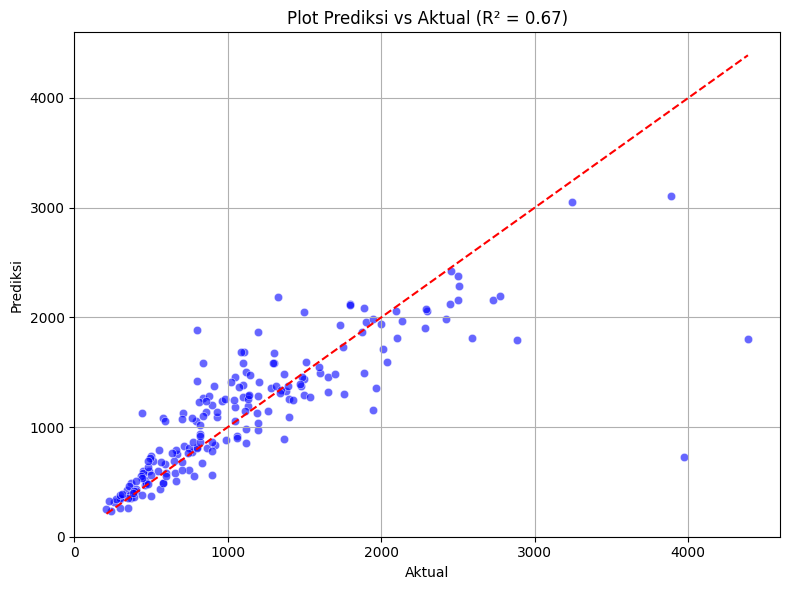

In [59]:
# Misal y_test dan y_pred sudah ada
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test_knn, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title(f"Plot Prediksi vs Aktual (R² = {r2_score(y_test, y_pred_test_knn):.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan hasil pengujian pada model KNN, dapat disimpulkan:

Setelah dilakukan pengujian, model ini termasuk overfitting tapi tidak begitu parah.

- Kelebihan:
    - Berdasarkan hasil dari R² Test sebesar 0.672, menunjukkan bahwa model masih mampu menjelaskan sekitar 67,2% data pada data uji.
    - Perbedaan performa antara train dan test tidak terlalu ekstrem, R² test 0.83 dan train 0.67 yang menunjukkan model masih memiliki kemampuan generalisasi yang moderat dan model tidak overfitting, tapi masih oveerfitting.

- Kekurangan:
    - Nilai MAE di test lebih tinggi dari train, ini menunjukkan model kehilangan akurasi saat diuji pada data baru.
    - Pada nilai MAE Test, menunjukkan juga bahwa model masih membuat kesalahan prediksi yang lumayan besar.

Berdasarkan hasil cross validation juga standar deviasinya kecil, berarti data semakin konsisten dan rata-rata eror di semua fold cukup moderat. Lalu hasilnya angka-angkanya pun konsisten yang membuat kesalahan di sekitar 180-240 euro saat memprediksi.

Dari grafik plot terlihat bahwa banyak data yang tersebar dekat garis merah, menandakan model cukup akurat di sebagian besar data. Tetapi saat data aktual semakin besar, nilai prediksinya semakin jauh dari garis merah yang menandakan bahwa model kesulitan memprediksi nilai yang besar.

## 2. SVR
---

In [60]:
# Trainig
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('Prepocessor',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['Inches', 'CPU_freq']),
                                                 ('categoric_ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['PrimaryStorageType',
                                                   'SecondaryStorageType',
                                                   'Ram_category',
                                                   'PrimaryStorage_category',
                                                   'SecondaryStorage_category',
                                                   'CPU_performance',
                                                   'GPU_performance']),
                                                 ('categoric_nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['OS', 'Screen',
                                                   'Touchscreen', 'IPSpanel',
                                                   'RetinaDisplay',
                                                   'CPU_company', 'GPU_company',
                                                   'Company_name'])])),
                ('modelsvr', SVR())])

In [61]:
# Prediksi
y_pred_train_svr = pipe_svr.predict(X_train)
y_pred_test_svr = pipe_svr.predict(X_test)
y_pred_train_svr

array([ 990.74980202,  993.10743694,  985.14564908, ...,  938.73193227,
        986.11189396, 1054.313219  ])

In [62]:
# Evaluation

print("Nilai MAE Train SVR: ", mean_absolute_error(y_train, y_pred_train_svr))
print("Nilai MAE Test SVR: ", mean_absolute_error(y_test, y_pred_test_svr))
print(' ')
print("Nilai R-Squared Train SVR: ", r2_score(y_train, y_pred_train_svr))
print("Nilai R-Squared Test SVR: ", r2_score(y_test, y_pred_test_svr))

Nilai MAE Train SVR:  483.71640863666846
Nilai MAE Test SVR:  494.92843556784896
 
Nilai R-Squared Train SVR:  0.0580753887055343
Nilai R-Squared Test SVR:  0.061122908318887226


In [63]:
#Cross Validation
validation_svr = cross_val_score(pipe_svr,
                                X_train,
                                y_train,
                                cv = 2,
                                scoring = 'neg_mean_absolute_error')

print('MAE - Mean    :', validation_svr.mean())
print('MAE - Std Dev :', validation_svr.std())

MAE - Mean    : -501.21389003057266
MAE - Std Dev : 14.216284750269864


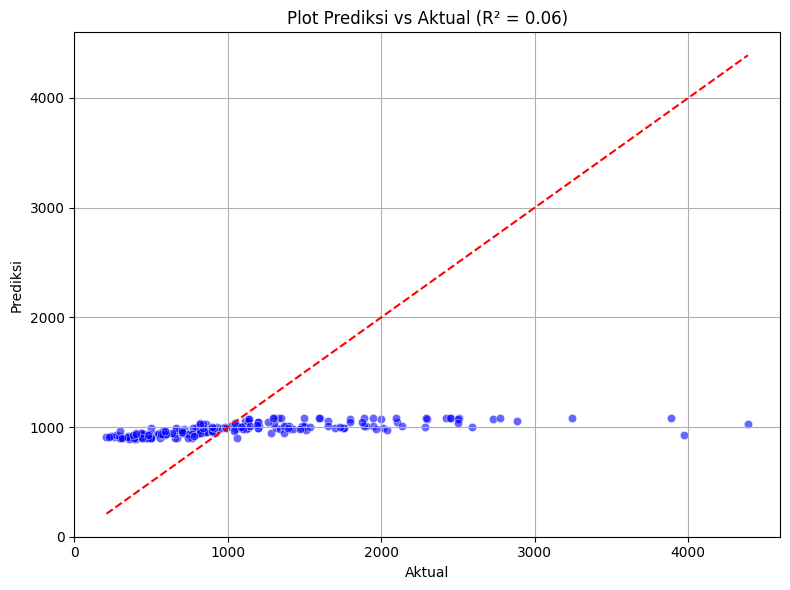

In [64]:
# Misal y_test dan y_pred sudah ada
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test_svr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title(f"Plot Prediksi vs Aktual (R² = {r2_score(y_test, y_pred_test_svr):.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan hasil pengujian pada model SVR, dapat disimpulkan:

- Kelebihan:
    - Berdasarkan dari hasil perhitungan MAE, menunjukkan bahwa model tidak overfit karena nilainya berdekatan antara train dan test. 
    - Pada cross validation nilai standar deviasinya kecil, menunjukkan bahwa data semakin konsisten untuk performa di tiap fold.

- Kekurangan:
    - Pada nilai R² hasilnya sangat rendah yaitu mendekati 0, yang menunjukkan bahwa model tidak menjelaskan variasi dalam data dan tidak belajar antara fitur dan target dengan baik.

Pada grafik terlihat bahwa data aktual di awal sudah tidak memilik pola dan tidak berada di garis merah. Dari awal persebaran data tidak akurat dan flat, yang di mana model memprediksi harga konsisten di 1000 saja. 

## 3. Decision Tree Regression
---

In [65]:
# Training
pipe_dectree.fit(X_train, y_train)

Pipeline(steps=[('Prepocessor',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['Inches', 'CPU_freq']),
                                                 ('categoric_ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['PrimaryStorageType',
                                                   'SecondaryStorageType',
                                                   'Ram_category',
                                                   'PrimaryStorage_category',
                                                   'SecondaryStorage_category',
                                                   'CPU_performance',
                                                   'GPU_performance']),
                                                 ('categoric_nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['OS', 'Screen',
                                                   'Touchscreen', 'IPSpanel',
                                                   'RetinaDisplay',
                                                   'CPU_company', 'GPU_company',
                                                   'Company_name'])])),
                ('modeldectree', DecisionTreeRegressor())])

In [66]:
# Prediksi
y_pred_train_dectree = pipe_dectree.predict(X_train)
y_pred_test_dectree = pipe_dectree.predict(X_test)
y_pred_train_dectree

array([1571.1 , 2250.68,  949.  , ...,  572.  , 1040.  , 1975.  ])

In [67]:
# Evaluation

print("Nilai MAE Train Decision Tree: ", mean_absolute_error(y_train, y_pred_train_dectree))
print("Nilai MAE Test Decision Tree: ", mean_absolute_error(y_test, y_pred_test_dectree))
print(' ')
print("Nilai R-Squared Train Decision Tree: ", r2_score(y_train, y_pred_train_dectree))
print("Nilai R-Squared Test Decision Tree: ", r2_score(y_test, y_pred_test_dectree))

Nilai MAE Train Decision Tree:  23.222345105328376
Nilai MAE Test Decision Tree:  235.9344415357766
 
Nilai R-Squared Train Decision Tree:  0.9894224952386365
Nilai R-Squared Test Decision Tree:  0.6433705320900331


In [68]:
#Cross Validation
validation_dectree = cross_val_score(pipe_dectree,
                                X_train,
                                y_train,
                                cv = 2,
                                scoring = 'neg_mean_absolute_error')

print('MAE - Mean    :', validation_dectree.mean())
print('MAE - Std Dev :', validation_dectree.std())

MAE - Mean    : -266.9888336431227
MAE - Std Dev : 5.489165117719978


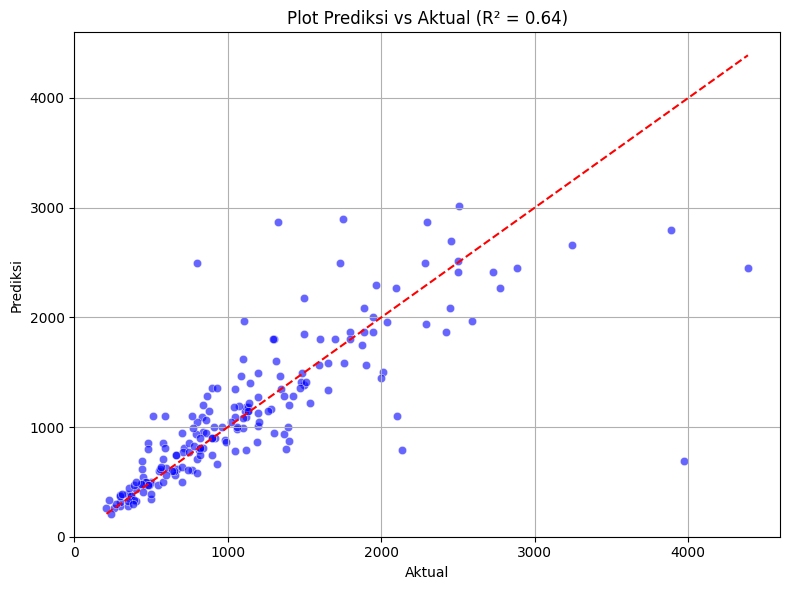

In [69]:
# Misal y_test dan y_pred sudah ada
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test_dectree, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title(f"Plot Prediksi vs Aktual (R² = {r2_score(y_test, y_pred_test_dectree):.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan hasil pengujian pada model Decision Tree, dapat disimpulkan:

- Pada MAE Train 23.22, sudah menunjukkan nilai yang sangat rendah di mana model tersebut bagus di data training. Tetapi pada MAE Test nilainya 244.34 yang di mana jauh lebih itnggi, yang menunjukkan penurunan performa di data baru.

- Kelebihan:
    - Terlihat dari nilai MAE Test bahwa model ini sangat mampu untuk mempelajari pola pada training dan model ini juga masih mampu menjelaskan variasi data sebesar 64% berdasarkan nilai R².

- Kekurangan:
    - Pada model ini performa trainnya sangat bagus, tetapi testnya jauh lebih buruk yang mengakibatkan model ini sangat overfit.

Pada cross validation nilai standar deviasinya 3.14 menunjukkan bahwa data konsisten dan stabil pada berbagai subset data atau tidak terlalu bergantung pada susunan data.

Lalu pada grafik plot menunjukkan bahwa pada data aktual harga rendah, model masih bisa memprediksinya yang dapat dilihat dari persebaran data berada di sekitar garis merah. Tetapi semakin data aktualnya besar, maka model sudah mulai tidak bisa memprediksinya dengan tepat.

## 4. Random Forest Regression
---

In [70]:
# Training
pipe_randfo.fit(X_train, y_train)

Pipeline(steps=[('Prepocessor',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['Inches', 'CPU_freq']),
                                                 ('categoric_ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['PrimaryStorageType',
                                                   'SecondaryStorageType',
                                                   'Ram_category',
                                                   'PrimaryStorage_category',
                                                   'SecondaryStorage_category',
                                                   'CPU_performance',
                                                   'GPU_performance']),
                                                 ('categoric_nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['OS', 'Screen',
                                                   'Touchscreen', 'IPSpanel',
                                                   'RetinaDisplay',
                                                   'CPU_company', 'GPU_company',
                                                   'Company_name'])])),
                ('modelrandfor', RandomForestRegressor())])

In [71]:
# Preediksi
y_pred_train_randfo = pipe_randfo.predict(X_train)
y_pred_test_randfo = pipe_randfo.predict(X_test)
y_pred_train_randfo

array([1558.87674286, 1900.1471    , 1037.35      , ...,  599.82285   ,
       1071.79346667, 1912.0432    ])

In [72]:
# Evaluation

print("Nilai MAE Train Random Forest: ", mean_absolute_error(y_train, y_pred_train_randfo))
print("Nilai MAE Test Random Forest: ", mean_absolute_error(y_test, y_pred_test_randfo))
print(' ')
print("Nilai R-Squared Train Random Forest: ", r2_score(y_train, y_pred_train_randfo))
print("Nilai R-Squared Test Random Forest: ", r2_score(y_test, y_pred_test_randfo))

Nilai MAE Train Random Forest:  85.25324390787523
Nilai MAE Test Random Forest:  202.63911622067724
 
Nilai R-Squared Train Random Forest:  0.9640778547127921
Nilai R-Squared Test Random Forest:  0.7218820668313297


In [73]:
#Cross Validation
validation_randfo = cross_val_score(pipe_randfo,
                                X_train,
                                y_train,
                                cv = 2,
                                scoring = 'neg_mean_absolute_error')

print('MAE - Mean    :', validation_randfo.mean())
print('MAE - Std Dev :', validation_randfo.std())

MAE - Mean    : -203.7046416306352
MAE - Std Dev : 0.2926588310983931


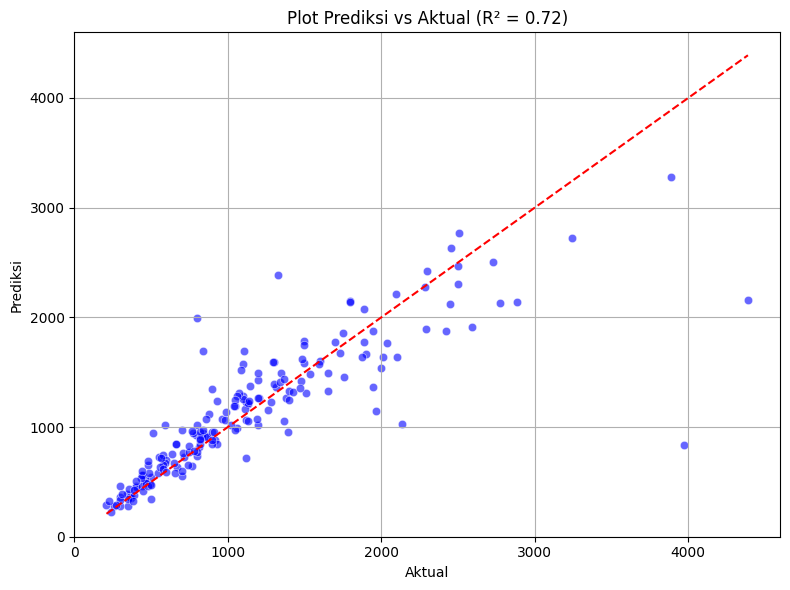

In [74]:
# Misal y_test dan y_pred sudah ada
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test_randfo, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title(f"Plot Prediksi vs Aktual (R² = {r2_score(y_test, y_pred_test_randfo):.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan hasil pengujian pada model Random Forest, dapat disimpulkan:

- Pada nilai MAE Train 86.08, menunjukkan bahwa model belajar dengan baik pada data latihan. Lalu pada MAE test nilainya cukup meningkat dengan signifikan, dan memberikan prediksi yang cukup akurat walaupun akurasinya seikit menurun. Dari hasil nilai, menunjukkan model ini overfit.

- Kelebihan:
    - Nilai R² test cukup tinggi yaitu 0.72 dan MAE Test cukup kecil, yang menunjukkan performa model bagus.
    - Nilai MAE dari cross validation stabil dan nilai standar deviasi 1.9 menunjukkan hasilnya konsisten.

- Kekurangan:
    - Selisih antara MAE Train dan Test menunjukkan model agak terlalu cocok pada data training.

Lalu pada grafik plot dapat terlihat bahwa model memprediksi untuk data aktual yang rendah cenderung stabil, tetapi saat data aktual besar model sudah tidak stabil untuk memprediksinya.




## 5. XGBoost
---

In [75]:
# Training
pipe_xgboost.fit(X_train, y_train)

Pipeline(steps=[('Prepocessor',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['Inches', 'CPU_freq']),
                                                 ('categoric_ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['PrimaryStorageType',
                                                   'SecondaryStorageType',
                                                   'Ram_category',
                                                   'PrimaryStorage_category',
                                                   'SecondaryStorage_category',
                                                   'CPU_performance',
                                                   'GPU_performance']),
                                                 (...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [76]:
# Prediksi
y_pred_train_xgb = pipe_xgboost.predict(X_train)
y_pred_test_xgb = pipe_xgboost.predict(X_test)
y_pred_train_xgb

array([1535.8353 , 2242.916  , 1077.8643 , ...,  558.44904, 1078.7662 ,
       1963.9506 ], dtype=float32)

In [77]:
# Evaluation

print("Nilai MAE Train XGBoost: ", mean_absolute_error(y_train, y_pred_train_xgb))
print("Nilai MAE Test XGBoost: ", mean_absolute_error(y_test, y_pred_test_xgb))
print(' ')
print("Nilai R-Squared Train XGBoost: ", r2_score(y_train, y_pred_train_xgb))
print("Nilai R-Squared Test XGBoost: ", r2_score(y_test, y_pred_test_xgb))

Nilai MAE Train XGBoost:  61.60489502974159
Nilai MAE Test XGBoost:  182.1429320745818
 
Nilai R-Squared Train XGBoost:  0.9782826802884695
Nilai R-Squared Test XGBoost:  0.7987662830681238


In [78]:
#Cross Validation
validation_xgb = cross_val_score(pipe_xgboost,
                                X_train,
                                y_train,
                                cv = 2,
                                scoring = 'neg_mean_absolute_error')

print('MAE - Mean    :', validation_xgb.mean())
print('MAE - Std Dev :', validation_xgb.std())

MAE - Mean    : -204.41919753687972
MAE - Std Dev : 4.493161326695557


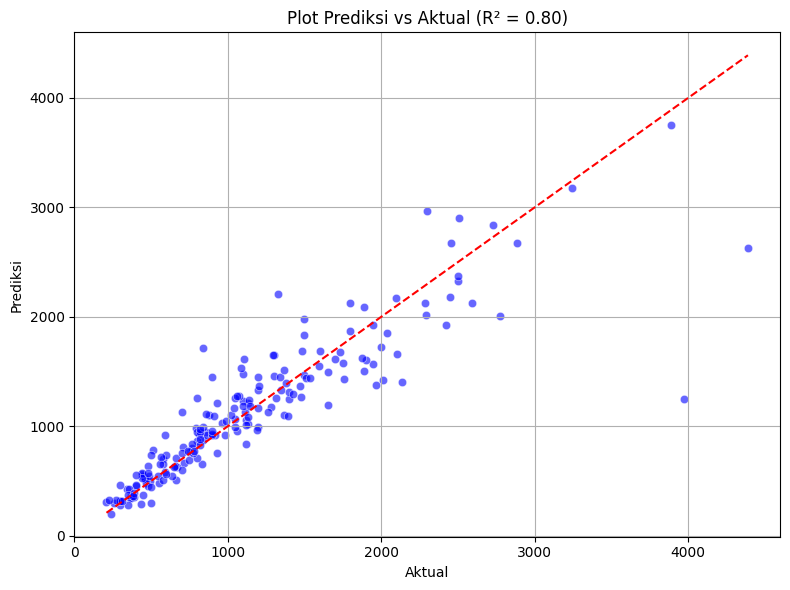

In [79]:
# Visualisasi data R2 square prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title(f"Plot Prediksi vs Aktual (R² = {r2_score(y_test, y_pred_test_xgb):.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan hasil pengujian pada model XGBoost, dapat disimpulkan:

- Pada MAE Train 61.60 nilainya cukup rendah yang artinya model mempelajari data training dengan sangat baik. Lalu pada MAE Test 182.14 nilainya meningkat cukup signifikan dari train. 

- Kelebihan: 
    - Nilai R² Test 0.798 model ini merupakan salah satu yang tertinggi dari semua model yang diuji.
    - Berdasarkan nilai cross validation standar deviasi mendapat nilai yang rendah menunjukkan model ini stabil pada berbagai subset data.

- Kelemahan:
    - Selisih antara MAE Train dan Test cukup besar yang menunjukkan bahwa model ini termasuk overfit, tapi masih dalam batas yang wajar.

Berdasarkan grafik plot dapat menunjukkan bahwa model ini memprediksi data aktual yang rendah dengan stabil, tetapi pada saat data aktual semakin tinggi model memprediksi sudah tidak begitu stabil yang ditunjukkan dari perseberan data titik biru nya mulai menjauh dari garis merah.

## Base Model Comparison
---

In [80]:
models = {
    'KNeighbors' : pipe_knn,
    'SVR' : pipe_svr,
    'Decision Tree' : pipe_dectree,
    'Random Forest' : pipe_randfo,
    'XGBoost' : pipe_xgboost
}

metrics = {
    'MAE' : mean_absolute_error,
}

base_model = pd.DataFrame(index=['MAE Train', 'MAE Test', 'R2 Train', 'R2 Test'], columns=models.keys())

for name, model in models.items():
    base_model.loc['MAE Train', name] = mean_absolute_error(y_train, model.predict(X_train))
    base_model.loc['MAE Test', name] = mean_absolute_error(y_test, model.predict(X_test))
    base_model.loc['R2 Train',name] = r2_score(y_train, model.predict(X_train))
    base_model.loc['R2 Test',name] = r2_score(y_test, model.predict(X_test))

base_model.T

,MAE Train,MAE Test,R2 Train,R2 Test
KNeighbors,187.580149,238.327351,0.832191,0.671643
SVR,483.716409,494.928436,0.058075,0.061123
Decision Tree,23.222345,235.934442,0.989422,0.643371
Random Forest,85.253244,202.639116,0.964078,0.721882
XGBoost,61.604895,182.142932,0.978283,0.798766


Kesimpulan dari kelima model yang sudah dilakukan training dan penghitungan metriks, dapat disimpulkan bahwa semua model merupakan overfit tetapi dilihat dari penghitungan metriks didapat model XGBoost yang paling bagus.

Berdasarkan dari nilai MAE Train XGBoost adalah yang paling rendah dari yang lain dan selisihnya pun rendah dengan MAE Test, walaupun ada Descision Tree yang paling rendah untuk MAE Train nya tetapi selisih dengan MAE Testnya terlalu jauh.

Lalu pada nilai R² Train model XGBoost mendekati nilai 1 di mana hampir sempurna 0.97 dengan R² Test nya 0.79, selisih sedikit hanya 0.17. Walaupun ada model lain yaitu Decision tree yang nilai R² Trainnya lebih besar, tetapi selisih dengan R² Testnya lebih jauh dengan nilai 0.33.

Jadi Berdasarkan kesimpulan di atas, model yang akan dipakai pada hyperparameter tuning yaitu XGBoost.

## Hyperparameter Tuning
---

In [81]:
# Mendefinisikan Hyperparameter
param_random = {
    'modelxgb__n_estimators': [100, 300, 500], # def = 100
    'modelxgb__max_depth': [2, 3, 6, 10], # def = 6
    'modelxgb__sub_sample': [0.7, 0.8, 0.9, 1.0], # def = 1.0 range(0.5-1.0)
    'modelxgb__colsample_bytree': [0.3, 0.5, 1.0,], # def = 1.0
    'modelxgb__reg_alpha': [0, 0.5, 1, 2], # def = 0
    'modelxgb__reg_lambda': [1, 2, 3, 5] # def = 1
}
param_random

{'modelxgb__n_estimators': [100, 300, 500],
 'modelxgb__max_depth': [2, 3, 6, 10],
 'modelxgb__sub_sample': [0.7, 0.8, 0.9, 1.0],
 'modelxgb__colsample_bytree': [0.3, 0.5, 1.0],
 'modelxgb__reg_alpha': [0, 0.5, 1, 2],
 'modelxgb__reg_lambda': [1, 2, 3, 5]}

In [82]:
# Train menggunakan Random Seacrh

xgb_randomcv = RandomizedSearchCV(estimator=pipe_xgboost,
                                 param_distributions=param_random,
                                 n_iter=50, # kombinasi parameter dicoba
                                 cv=8, # pembagian fold cross validation
                                 random_state=6,
                                 n_jobs=-1,
                                 scoring='neg_mean_absolute_error',
)
xgb_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=8,
                   estimator=Pipeline(steps=[('Prepocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               MinMaxScaler(),
                                                                               ['Inches',
                                                                                'CPU_freq']),
                                                                              ('categoric_ord',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['PrimaryStorageType',
                                                                                'SecondaryStorageType',
                                                                                'Ram_category',
                                                                                'PrimaryStorage_category',
                                                                                'SecondaryStorage_category',
                                                                                'CPU_...
                                                           num_parallel_tree=None,
                                                           random_state=None, ...))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modelxgb__colsample_bytree': [0.3, 0.5,
                                                                       1.0],
                                        'modelxgb__max_depth': [2, 3, 6, 10],
                                        'modelxgb__n_estimators': [100, 300,
                                                                   500],
                                        'modelxgb__reg_alpha': [0, 0.5, 1, 2],
                                        'modelxgb__reg_lambda': [1, 2, 3, 5],
                                        'modelxgb__sub_sample': [0.7, 0.8, 0.9,
                                                                 1.0]},
                   random_state=6, scoring='neg_mean_absolute_error')

In [83]:
# Mendapatkan best hyperparameter
xgb_randomcv.best_params_

{'modelxgb__sub_sample': 1.0,
 'modelxgb__reg_lambda': 3,
 'modelxgb__reg_alpha': 2,
 'modelxgb__n_estimators': 300,
 'modelxgb__max_depth': 3,
 'modelxgb__colsample_bytree': 0.5}

In [84]:
# Mendapatkan best estimator
xgb_randomcv_best = xgb_randomcv.best_estimator_
xgb_randomcv_best

Pipeline(steps=[('Prepocessor',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['Inches', 'CPU_freq']),
                                                 ('categoric_ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['PrimaryStorageType',
                                                   'SecondaryStorageType',
                                                   'Ram_category',
                                                   'PrimaryStorage_category',
                                                   'SecondaryStorage_category',
                                                   'CPU_performance',
                                                   'GPU_performance']),
                                                 (...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [85]:
# Prediksi
y_pred_train_xgb_random = xgb_randomcv_best.predict(X_train)
y_pred_test_xgb_random = xgb_randomcv_best.predict(X_test)

In [86]:
# Mencetak nilai MAE Train, Test dan R-Squared Train, Test
print("Nilai MAE Train XGBoost: ", mean_absolute_error(y_train, y_pred_train_xgb_random))
print("Nilai MAE Test XGBoost: ", mean_absolute_error(y_test, y_pred_test_xgb_random))
print(' ')
print("Nilai R-Squared Train XGBoost: ", r2_score(y_train, y_pred_train_xgb_random))
print("Nilai R-Squared Test XGBoost: ", r2_score(y_test, y_pred_test_xgb_random))

Nilai MAE Train XGBoost:  126.8044529020742
Nilai MAE Test XGBoost:  175.05768840370382
 
Nilai R-Squared Train XGBoost:  0.9297222755866364
Nilai R-Squared Test XGBoost:  0.8425473778296501


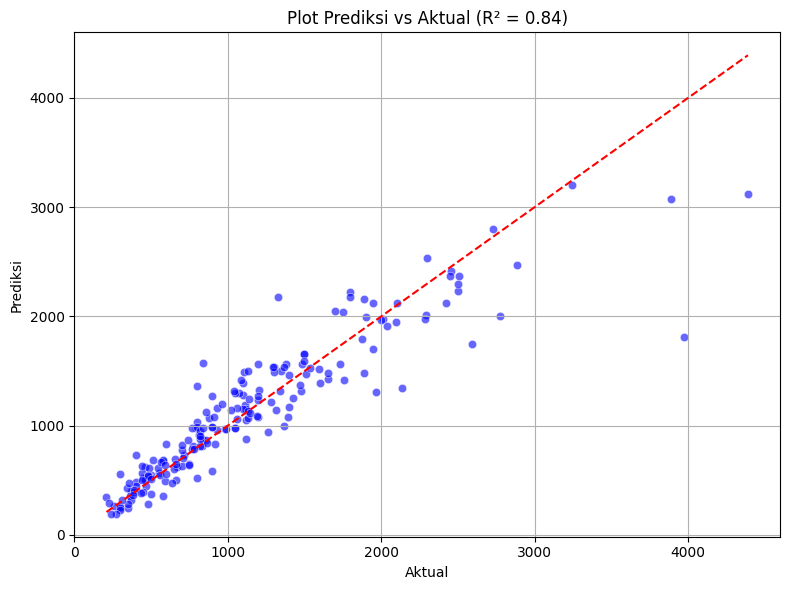

In [87]:
# Visualisasi data R2 square prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test_xgb_random, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title(f"Plot Prediksi vs Aktual (R² = {r2_score(y_test, y_pred_test_xgb_random):.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan data di atas setelah hyperparameter tuning dapat disimpulkan:

Dari hasil penghitungan metriks MAE, model belajar dengan cukup akurat di train dan mampu mempertahankan performa pada test meskipun sedikit menurun. Lalu hasil dari penghitungan R² menunjukkan akurasi yang tinggi dan konsisten antara data train dan test. Walaupun model ini merupakan overfit tetapi tidak ekstrim. 

Dari semua model yang sudah dilakukan penghitungan dapat model yang terbaik untuk dijadikan ke dalam model inference, yaitu model yang sudah dilakukan hyperparameter tuning. Selanjutnya akan dilakukan model saving dan dilakukan model inference.

In [88]:
models = {
    'XGBoost Before Tuning' : pipe_xgboost,
    'XGBoost After Tuning' : xgb_randomcv_best
    
}

metrics = {
    'MAE' : mean_absolute_error,
}

base_model_HPT = pd.DataFrame(index=['MAE Train', 'MAE Test', 'R2 Train', 'R2 Test'], columns=models.keys())

for name, model in models.items():
    base_model_HPT.loc['MAE Train', name] = mean_absolute_error(y_train, model.predict(X_train))
    base_model_HPT.loc['MAE Test', name] = mean_absolute_error(y_test, model.predict(X_test))
    base_model_HPT.loc['R2 Train',name] = r2_score(y_train, model.predict(X_train))
    base_model_HPT.loc['R2 Test',name] = r2_score(y_test, model.predict(X_test))

base_model_HPT.T

,MAE Train,MAE Test,R2 Train,R2 Test
XGBoost Before Tuning,61.604895,182.142932,0.978283,0.798766
XGBoost After Tuning,126.804453,175.057688,0.929722,0.842547


# VII. Model Saving
---

In [89]:
with open('model_file.pkl', 'wb') as model_file:
  pickle.dump(xgb_randomcv_best, model_file)

# VIII. Model Inference
---

Pada model ini terdapat di notebook file yang berbeda bernama Model_Inference.ipynb

# IX. Pengambilan Kesimpulan
---

Tujuan dari proyek ini adalah membuat model Machine Learning untuk memprediksi harga laptop berdasarkan kriteria yag diinginkan. Pembuatan Machine Learning ini menggunakan 5 model regression, yaitu KNN, SVM, Decision Tree, Random Forest, dan Boosting dengan metriks MAE dan R-squared. Setelah dilakukan analisis dan perbandingan, didapat model yang terbaik yaitu XGBoost yang selanjutnya akan dilakukan hyperparameter tuning. Setelah dicoba di hyperparameter tuning, didapatkan hasilnya lebih baik dari sebelumnya. Hasil dari parameter tuning ini digunakan untuk memprediksi harga laptop.

Pada hasil model Inference dilakukan penginputan kriteria laptop yang diinginkan calon pembeli untuk memprediksi harga laptop, dan didapatkan dari model XGBoost dengan hyperparameter tuning prediksi harga laptop sebesar 2398.1367 euro yang sesuai dengan kriteria laptop calon pembeli.

Rekomendasi yang digunakan untuk ke depannya agar model bisa goodfit yaitu dengan mengevaluasi kembali fitur-fitur yang masih memiliki high cardinality, lalu dengan modifikasi fitur diharapkan bisa dilakukan evaluasi agar nilai MAE nya bisa berkurang.